<a href="https://colab.research.google.com/github/Dedalus1982/MIPHI_Kurs_Classik_ML/blob/main/Kurs_classic_DAF_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных:

In [ ]:
!pip install umap-learn

In [ ]:
from google.colab import files
import os
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
from scipy.stats import probplot, shapiro, anderson
from umap import UMAP
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# проверяем, существует ли файл в колабе, если нет - то загружаем
file_path = 'Данные_для_курсовои_Классическое_МО.xlsx'
if os.path.exists(file_path):
    print("Файл найден, продолжаем выполнение.")
else:
    print("Файл не найден. Пожалуйста, загрузите файл.")
    uploaded = files.upload()

Файл не найден. Пожалуйста, загрузите файл.


Saving Данные_для_курсовои_Классическое_МО.xlsx to Данные_для_курсовои_Классическое_МО.xlsx


In [ ]:
df = pd.read_excel('Данные_для_курсовои_Классическое_МО.xlsx', index_col=0)
df.head()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


In [ ]:
# Замена имен столбцов
df = df.rename(columns={
    'IC50, mM': 'IC50',
    'CC50, mM': 'CC50'
})

# Проверка изменений
print(df.head())

         IC50        CC50         SI  MaxAbsEStateIndex  MaxEStateIndex  \
0    6.239374  175.482382  28.125000           5.094096        5.094096   
1    0.771831    5.402819   7.000000           3.961417        3.961417   
2  223.808778  161.142320   0.720000           2.627117        2.627117   
3    1.705624  107.855654  63.235294           5.097360        5.097360   
4  107.131532  139.270991   1.300000           5.150510        5.150510   

   MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  ...  \
0           0.387225        0.387225  0.417362  42.928571  384.652  ...   
1           0.533868        0.533868  0.462473  45.214286  388.684  ...   
2           0.543231        0.543231  0.260923  42.187500  446.808  ...   
3           0.390603        0.390603  0.377846  41.862069  398.679  ...   
4           0.270476        0.270476  0.429038  36.514286  466.713  ...   

   fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0           0         

# Анализ структуры данных и их предобработка
* Заполнены пропуски в данных
* Провели масштабирование StandardScaler
* Провели снижение размерности c PCA до 50 признаков
* Провели снижение размерности с t-SNE до 3 признаков
* Визуализировали и сохранили данные после PCA и после t-SNE

In [ ]:
# @title Пропуски
# Проверка на наличие пропусков
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Поиск строк с пропусками
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Заполнение пустых значений медианой по каждому столбцу
df = df.fillna(df.median())
missing_values_after = df.isnull().sum()
print('После заполнения медианой:')
print(missing_values_after[missing_values_after > 0])

MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64
После заполнения медианой:
Series([], dtype: int64)


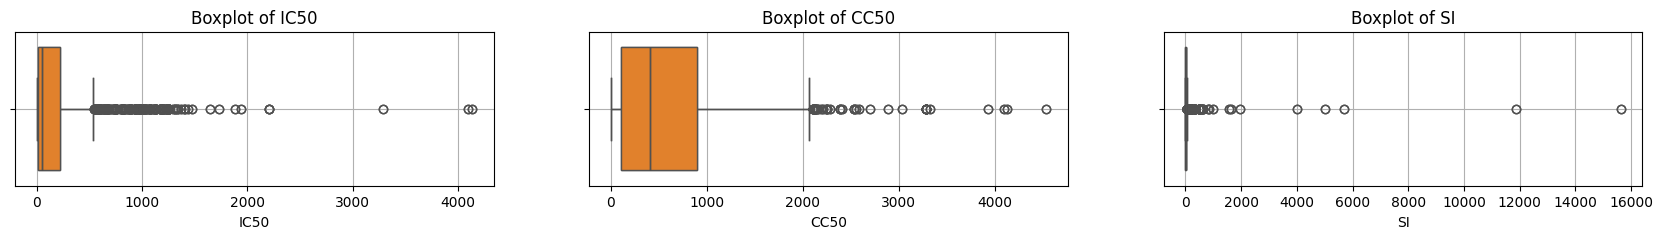

In [ ]:
plt.figure(figsize=(21, 2))
# IC50
plt.subplot(1, 3, 1)
sns.boxplot(x=df['IC50'])
sns.boxplot(x=df['IC50'])
plt.title(f'Boxplot of IC50')
plt.xlabel('IC50')
plt.grid(True)

# CC50
plt.subplot(1, 3, 2)
sns.boxplot(x=df['CC50'])
sns.boxplot(x=df['CC50'])
plt.title(f'Boxplot of CC50')
plt.xlabel('CC50')
plt.grid(True)

# SI
plt.subplot(1, 3, 3)
sns.boxplot(x=df['SI'])
sns.boxplot(x=df['SI'])
plt.title(f'Boxplot of SI')
plt.xlabel('SI')
plt.grid(True)
plt.show()

In [ ]:
df = df.drop_duplicates()
df

,IC50,CC50,SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,0,0,0
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,0,0,0
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,1,0,0,0,0,0,0,0,0,0
999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,522.635,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Для проверки, что SI - целое число (с любым типом)
mask = np.isclose(df['SI'] % 1, 0, atol=1e-8)
df = df[~mask]
df

,IC50,CC50,SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
6,18.908167,14.559288,0.770000,2.584472,2.584472,0.429649,0.429649,0.328539,36.564103,528.869,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.998674,34.998823,1.093759,13.517101,13.517101,0.012610,-0.608595,0.480277,50.181818,458.639,...,0,0,0,0,0,0,0,0,0,0
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,0,0,0
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,0,0,0
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,1,0,0,0,0,0,0,0,0,0


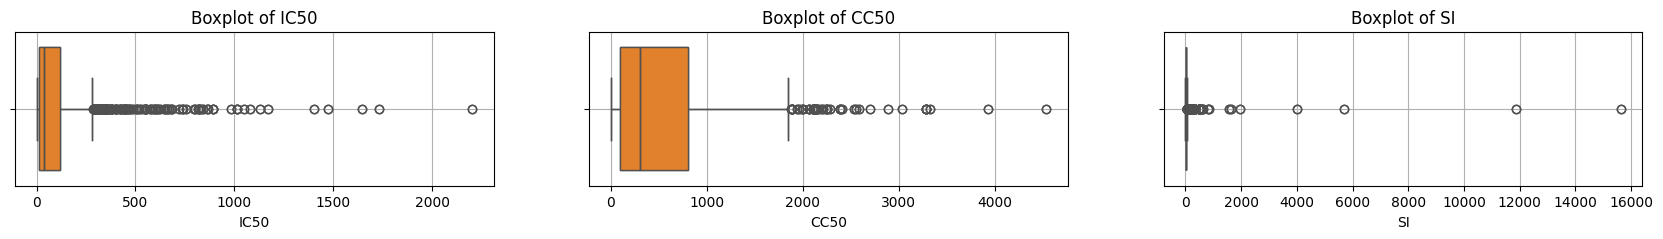

In [ ]:
plt.figure(figsize=(21, 2))
# IC50
plt.subplot(1, 3, 1)
sns.boxplot(x=df['IC50'])
sns.boxplot(x=df['IC50'])
plt.title(f'Boxplot of IC50')
plt.xlabel('IC50')
plt.grid(True)

# CC50
plt.subplot(1, 3, 2)
sns.boxplot(x=df['CC50'])
sns.boxplot(x=df['CC50'])
plt.title(f'Boxplot of CC50')
plt.xlabel('CC50')
plt.grid(True)

# SI
plt.subplot(1, 3, 3)
sns.boxplot(x=df['SI'])
sns.boxplot(x=df['SI'])
plt.title(f'Boxplot of SI')
plt.xlabel('SI')
plt.grid(True)
plt.show()

In [ ]:
cleaned_df = df[df['IC50'] <= 100]
cleaned_df

,IC50,CC50,SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
6,18.908167,14.559288,0.770000,2.584472,2.584472,0.429649,0.429649,0.328539,36.564103,528.869,...,0,0,0,0,0,0,0,0,0,0
7,28.773087,23.593931,0.820000,13.821880,13.821880,0.079845,-0.301260,0.217332,31.333333,695.089,...,0,0,0,0,0,0,0,0,4,0
8,50.057068,153.709268,3.070681,14.171614,14.171614,0.019123,-0.411828,0.187781,29.157895,763.123,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.998674,34.998823,1.093759,13.517101,13.517101,0.012610,-0.608595,0.480277,50.181818,458.639,...,0,0,0,0,0,0,0,0,0,0
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,0,0,0
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,0,0,0
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
cleaned_df[['IC50']].describe()

,IC50
count,576.000000
mean,28.541324
std,26.797457
min,0.003517
25%,7.078396
50%,20.821005
75%,41.003646
max,99.999663


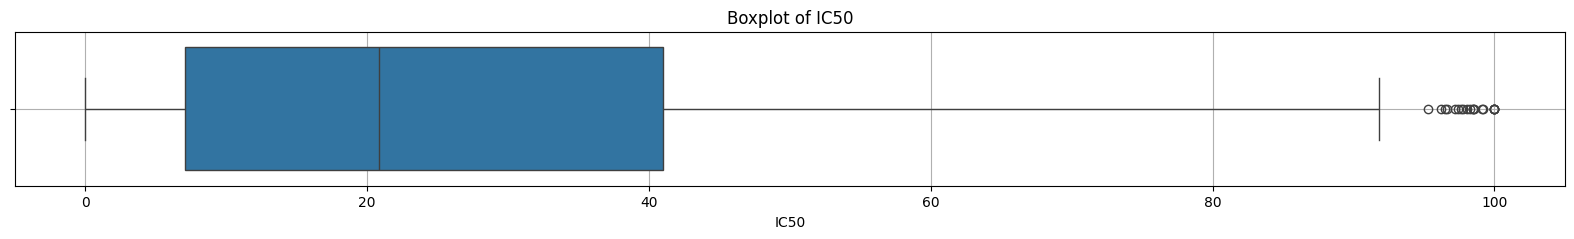

После удаления выбросов для IC50, количество строк: 504


<ipython-input-29-3f18ad353c59>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df = cleaned_df[(cleaned_df['IC50'] >= lower_bound) & (df['IC50'] <= upper_bound)][non_target_columns.union(['IC50'])]


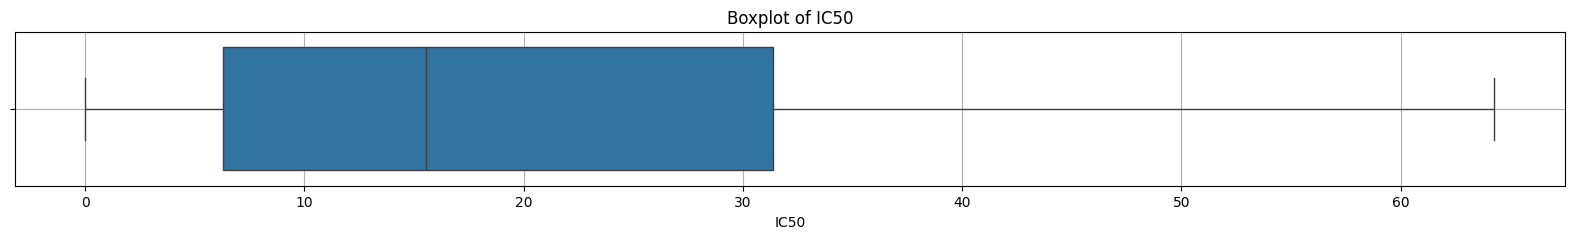

,AvgIpc,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BCUT2D_MWHI,BCUT2D_MWLOW,BalabanJ,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,3.150503,2.600532,-2.343082,2.644698,-2.322229,5.944519,0.193481,14.822266,9.700470,1.164038,...,0,0,0,0,0,0,0,3,0,0.417362
3,3.179270,2.600529,-2.342885,2.644709,-2.322030,5.944502,0.193510,14.821216,9.700497,1.120513,...,0,0,0,0,0,0,0,4,0,0.377846
6,3.412805,2.670743,-2.469845,2.682798,-2.570517,5.484712,0.073597,15.361012,9.680919,1.156406,...,0,0,0,0,0,0,0,0,0,0.328539
7,3.095617,2.558257,-2.542701,2.585933,-2.549778,5.834762,-0.139101,16.152882,9.492176,0.924548,...,0,0,0,0,0,0,0,4,0,0.217332
8,3.184153,2.560237,-2.542448,2.589584,-2.534166,5.961178,-0.133398,16.152997,9.492103,0.893803,...,0,0,0,0,0,0,0,0,0,0.187781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.172816,2.759968,-2.710653,2.780376,-2.685489,5.802787,-0.224257,16.528905,9.319594,1.681736,...,0,0,0,0,0,0,0,0,0,0.480277
996,3.023764,2.726237,-2.677345,2.739076,-2.646743,5.980114,-0.196385,16.586886,9.344314,1.646946,...,0,0,0,0,0,0,0,0,0,0.382752
997,3.130958,2.725543,-2.679467,2.738755,-2.655659,5.980828,-0.187625,16.586914,9.343622,1.535171,...,0,0,0,0,0,0,0,0,0,0.369425
998,3.204255,2.725818,-2.679527,2.738943,-2.656447,7.980998,-0.187687,32.166365,9.343613,1.493776,...,0,0,0,0,0,0,0,0,0,0.284923


In [ ]:
# @title Анализ выбросов и создание очищенных DataFrame для каждой целевой переменной
targets = cleaned_df['IC50']

# IC50
plt.figure(figsize=(20, 2))
sns.boxplot(x=cleaned_df['IC50'])
plt.title(f'Boxplot of IC50')
plt.xlabel('IC50')
plt.grid(True)
plt.show()

Q1 = targets.quantile(0.25)
Q3 = targets.quantile(0.75)
IQR = Q3 - Q1
lower_bound = -10
upper_bound = Q3 + 0.75 * IQR

non_target_columns = cleaned_df.columns.difference(targets)
cleaned_df = cleaned_df[(cleaned_df['IC50'] >= lower_bound) & (df['IC50'] <= upper_bound)][non_target_columns.union(['IC50'])]
print(f'После удаления выбросов для IC50, количество строк: {cleaned_df.shape[0]}')

# IC50
plt.figure(figsize=(20, 2))
sns.boxplot(x=cleaned_df['IC50'])
plt.title(f'Boxplot of IC50')
plt.xlabel('IC50')
plt.grid(True)
plt.show()
cleaned_df

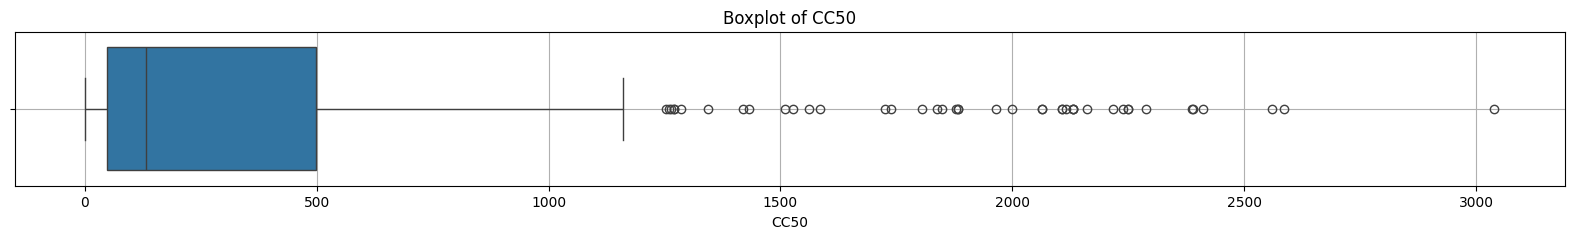

In [ ]:
# CC50
plt.figure(figsize=(20, 2))
sns.boxplot(x=cleaned_df['CC50'])
plt.title(f'Boxplot of CC50')
plt.xlabel('CC50')
plt.grid(True)
plt.show()



In [ ]:
cleaned_df = cleaned_df[cleaned_df['CC50'] <= 1000]
cleaned_df

,AvgIpc,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BCUT2D_MWHI,BCUT2D_MWLOW,BalabanJ,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,3.150503,2.600532,-2.343082,2.644698,-2.322229,5.944519,0.193481,14.822266,9.700470,1.164038,...,0,0,0,0,0,0,0,3,0,0.417362
3,3.179270,2.600529,-2.342885,2.644709,-2.322030,5.944502,0.193510,14.821216,9.700497,1.120513,...,0,0,0,0,0,0,0,4,0,0.377846
6,3.412805,2.670743,-2.469845,2.682798,-2.570517,5.484712,0.073597,15.361012,9.680919,1.156406,...,0,0,0,0,0,0,0,0,0,0.328539
7,3.095617,2.558257,-2.542701,2.585933,-2.549778,5.834762,-0.139101,16.152882,9.492176,0.924548,...,0,0,0,0,0,0,0,4,0,0.217332
8,3.184153,2.560237,-2.542448,2.589584,-2.534166,5.961178,-0.133398,16.152997,9.492103,0.893803,...,0,0,0,0,0,0,0,0,0,0.187781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.172816,2.759968,-2.710653,2.780376,-2.685489,5.802787,-0.224257,16.528905,9.319594,1.681736,...,0,0,0,0,0,0,0,0,0,0.480277
996,3.023764,2.726237,-2.677345,2.739076,-2.646743,5.980114,-0.196385,16.586886,9.344314,1.646946,...,0,0,0,0,0,0,0,0,0,0.382752
997,3.130958,2.725543,-2.679467,2.738755,-2.655659,5.980828,-0.187625,16.586914,9.343622,1.535171,...,0,0,0,0,0,0,0,0,0,0.369425
998,3.204255,2.725818,-2.679527,2.738943,-2.656447,7.980998,-0.187687,32.166365,9.343613,1.493776,...,0,0,0,0,0,0,0,0,0,0.284923


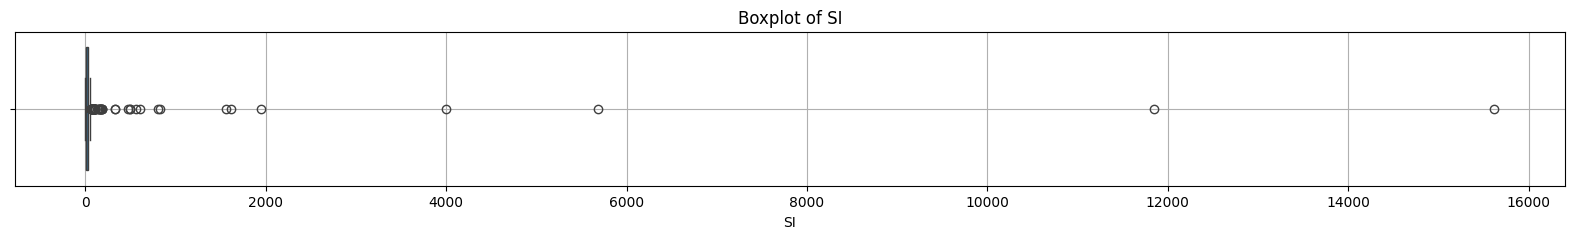

In [ ]:
# SI
plt.figure(figsize=(20, 2))
sns.boxplot(x=cleaned_df['SI'])
plt.title(f'Boxplot of SI')
plt.xlabel('SI')
plt.grid(True)
plt.show()

In [ ]:
cleaned_df = cleaned_df[cleaned_df['SI'] <= 500]
cleaned_df

,AvgIpc,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BCUT2D_MWHI,BCUT2D_MWLOW,BalabanJ,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,3.150503,2.600532,-2.343082,2.644698,-2.322229,5.944519,0.193481,14.822266,9.700470,1.164038,...,0,0,0,0,0,0,0,3,0,0.417362
3,3.179270,2.600529,-2.342885,2.644709,-2.322030,5.944502,0.193510,14.821216,9.700497,1.120513,...,0,0,0,0,0,0,0,4,0,0.377846
6,3.412805,2.670743,-2.469845,2.682798,-2.570517,5.484712,0.073597,15.361012,9.680919,1.156406,...,0,0,0,0,0,0,0,0,0,0.328539
7,3.095617,2.558257,-2.542701,2.585933,-2.549778,5.834762,-0.139101,16.152882,9.492176,0.924548,...,0,0,0,0,0,0,0,4,0,0.217332
8,3.184153,2.560237,-2.542448,2.589584,-2.534166,5.961178,-0.133398,16.152997,9.492103,0.893803,...,0,0,0,0,0,0,0,0,0,0.187781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.172816,2.759968,-2.710653,2.780376,-2.685489,5.802787,-0.224257,16.528905,9.319594,1.681736,...,0,0,0,0,0,0,0,0,0,0.480277
996,3.023764,2.726237,-2.677345,2.739076,-2.646743,5.980114,-0.196385,16.586886,9.344314,1.646946,...,0,0,0,0,0,0,0,0,0,0.382752
997,3.130958,2.725543,-2.679467,2.738755,-2.655659,5.980828,-0.187625,16.586914,9.343622,1.535171,...,0,0,0,0,0,0,0,0,0,0.369425
998,3.204255,2.725818,-2.679527,2.738943,-2.656447,7.980998,-0.187687,32.166365,9.343613,1.493776,...,0,0,0,0,0,0,0,0,0,0.284923


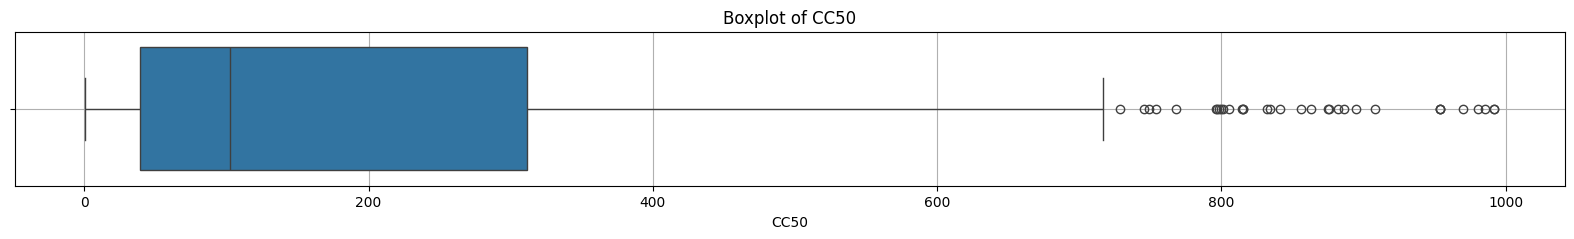

In [ ]:
# CC50
plt.figure(figsize=(20, 2))
sns.boxplot(x=cleaned_df['CC50'])
plt.title(f'Boxplot of CC50')
plt.xlabel('CC50')
plt.grid(True)
plt.show()

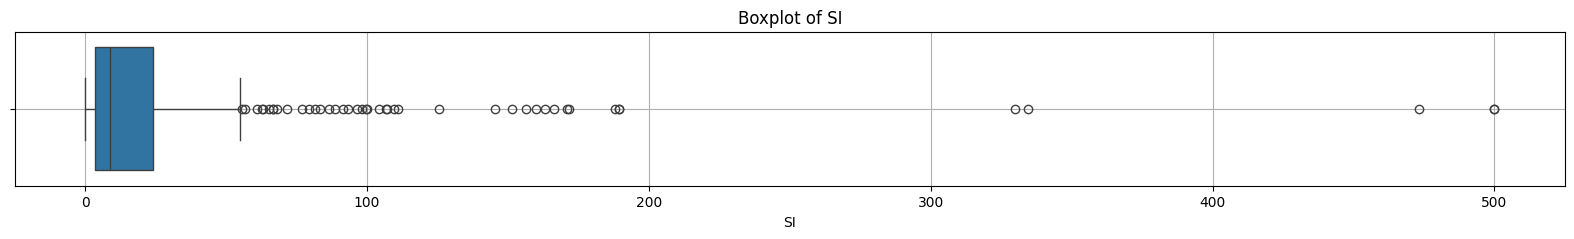

In [ ]:
# SI
plt.figure(figsize=(20, 2))
sns.boxplot(x=cleaned_df['SI'])
plt.title(f'Boxplot of SI')
plt.xlabel('SI')
plt.grid(True)
plt.show()

In [ ]:
cleaned_IC50 = cleaned_df.drop(['CC50', 'SI'], axis=1)
cleaned_CC50 = cleaned_df.drop(['IC50', 'SI'], axis=1)
cleaned_SI = cleaned_df.drop(['IC50', 'CC50'], axis=1)

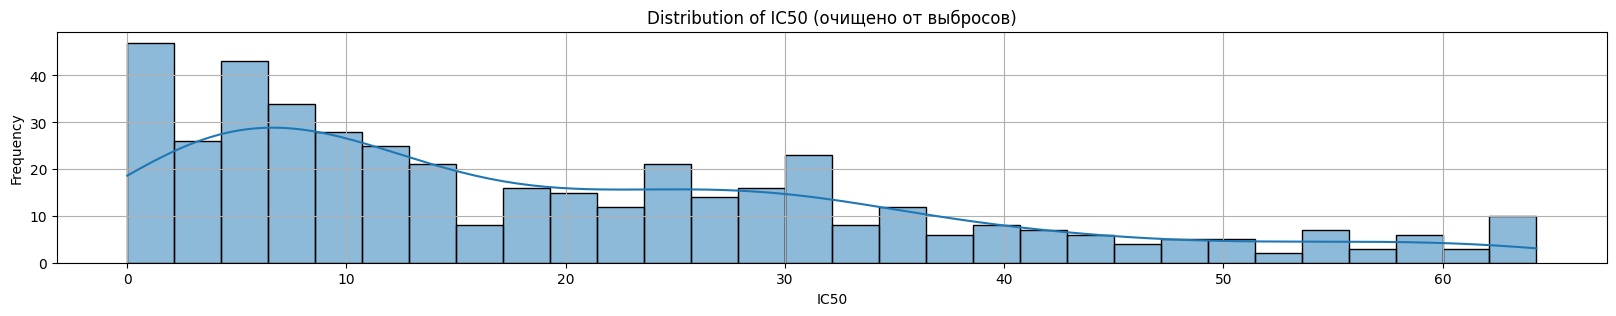

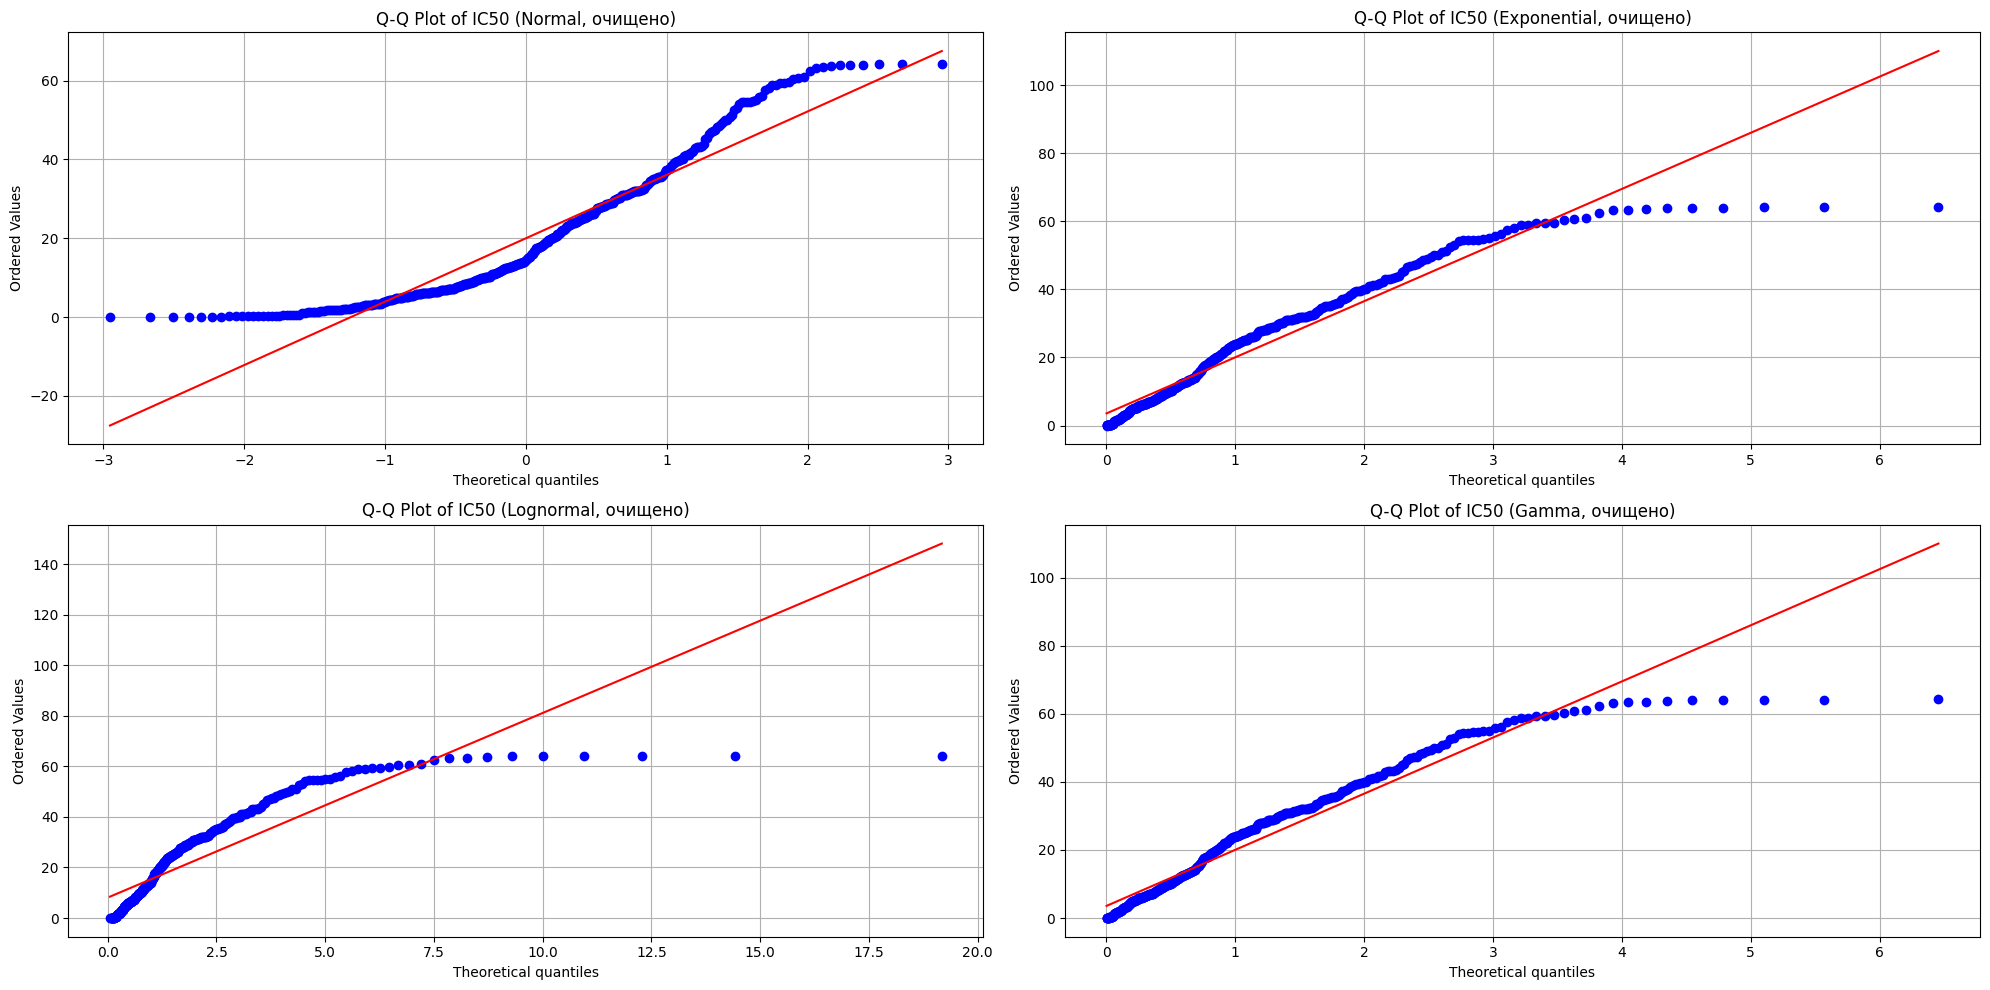

Шапиро-Уилк тест для IC50 (очищено): статистика=0.903, p-значение=0.000
Андерсон-Дарлинг тест для IC50 с распределением Normal (очищено): статистика=12.655
Критическое значение для уровня значимости 1.0: 1.082
IC50 не соответствует Normal распределению (по тесту Андерсона-Дарлинга, очищено)

Андерсон-Дарлинг тест для IC50 с распределением Exponential (очищено): статистика=2.556
Критическое значение для уровня значимости 1.0: 1.954
IC50 не соответствует Exponential распределению (по тесту Андерсона-Дарлинга, очищено)



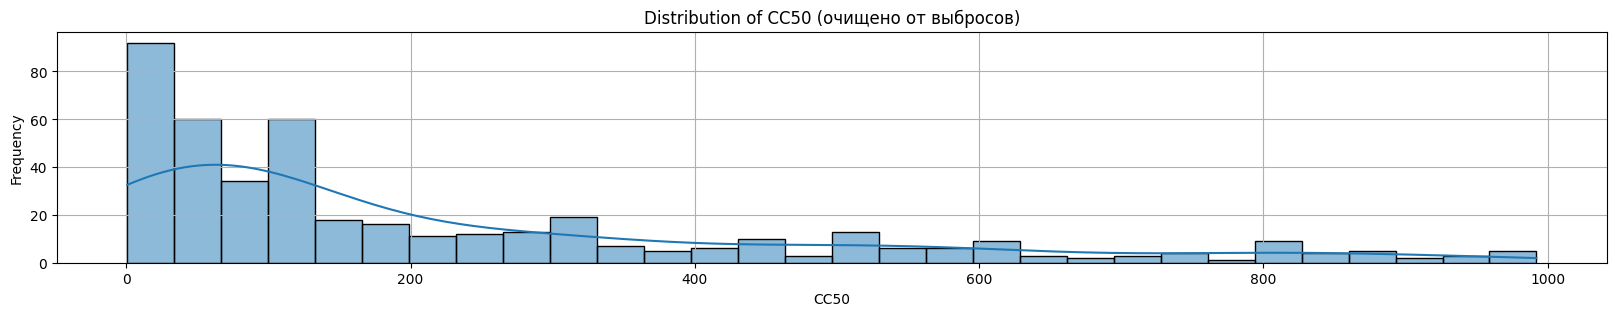

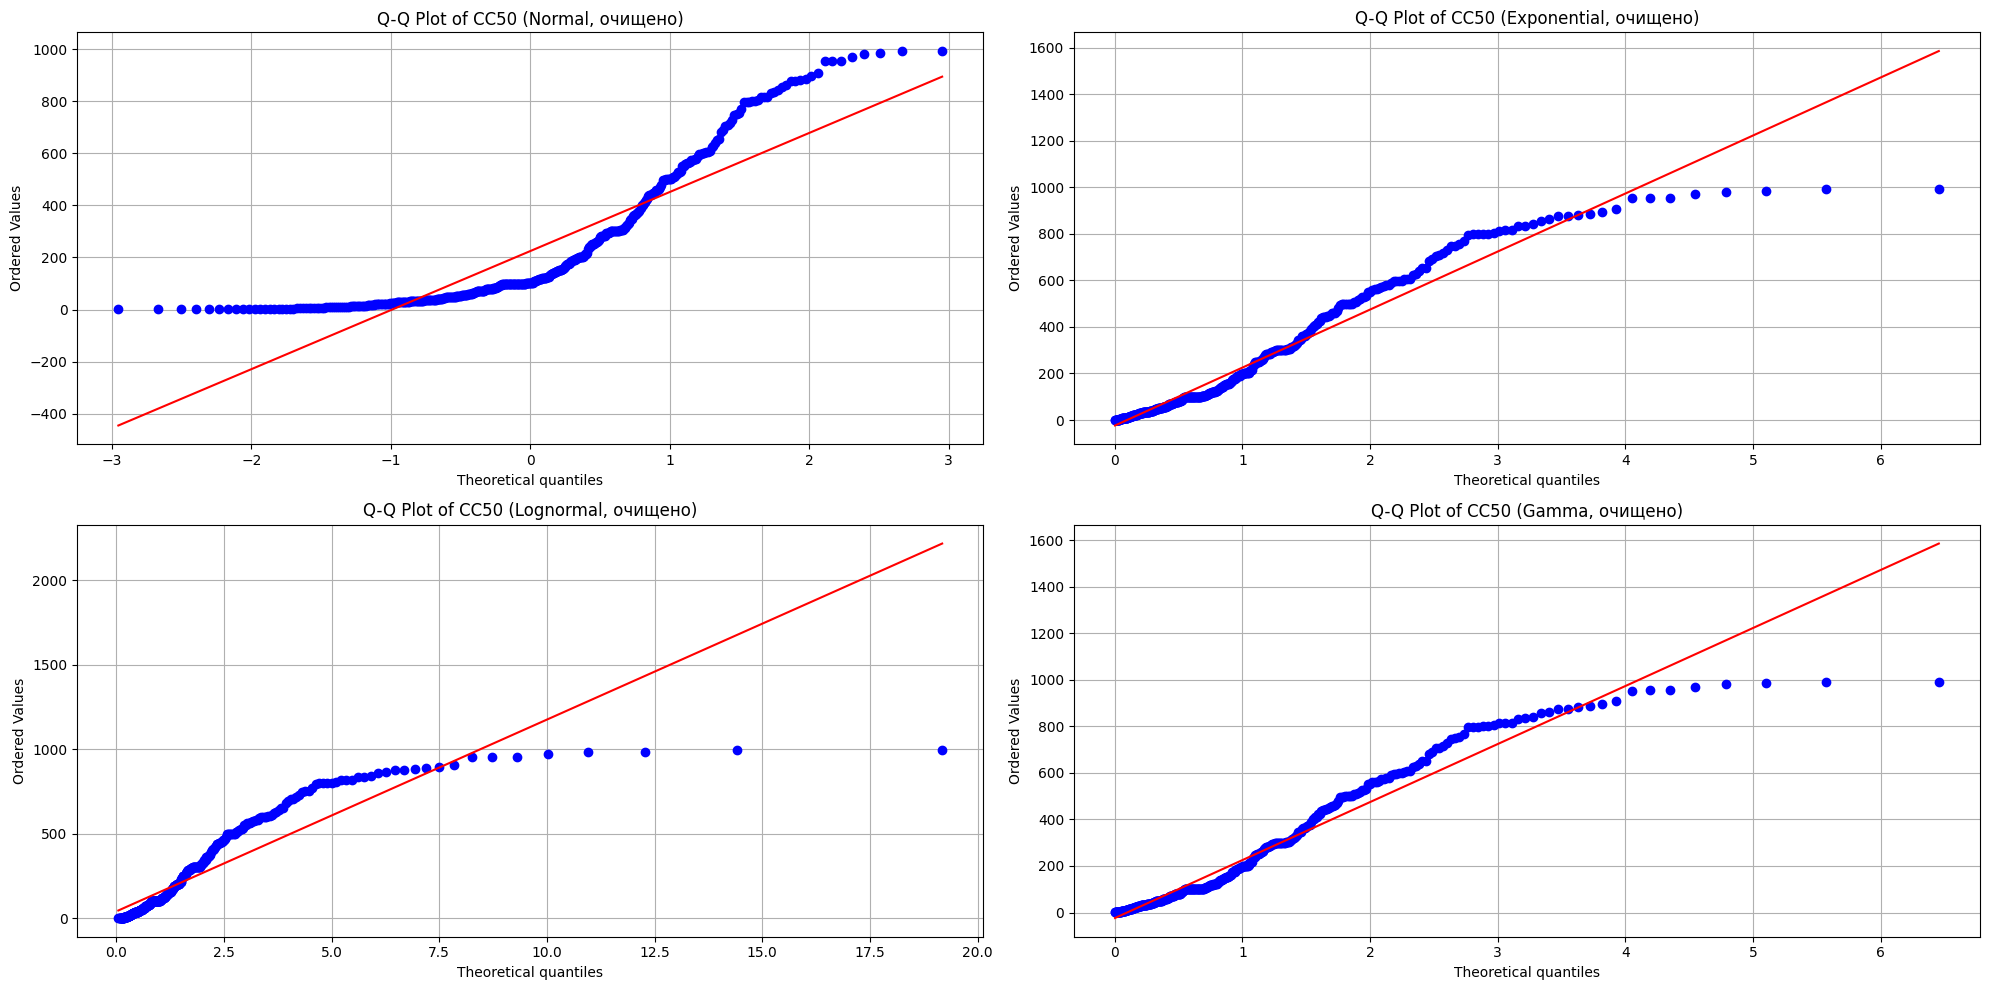

Шапиро-Уилк тест для CC50 (очищено): статистика=0.802, p-значение=0.000
Андерсон-Дарлинг тест для CC50 с распределением Normal (очищено): статистика=31.666
Критическое значение для уровня значимости 1.0: 1.082
CC50 не соответствует Normal распределению (по тесту Андерсона-Дарлинга, очищено)

Андерсон-Дарлинг тест для CC50 с распределением Exponential (очищено): статистика=12.927
Критическое значение для уровня значимости 1.0: 1.954
CC50 не соответствует Exponential распределению (по тесту Андерсона-Дарлинга, очищено)



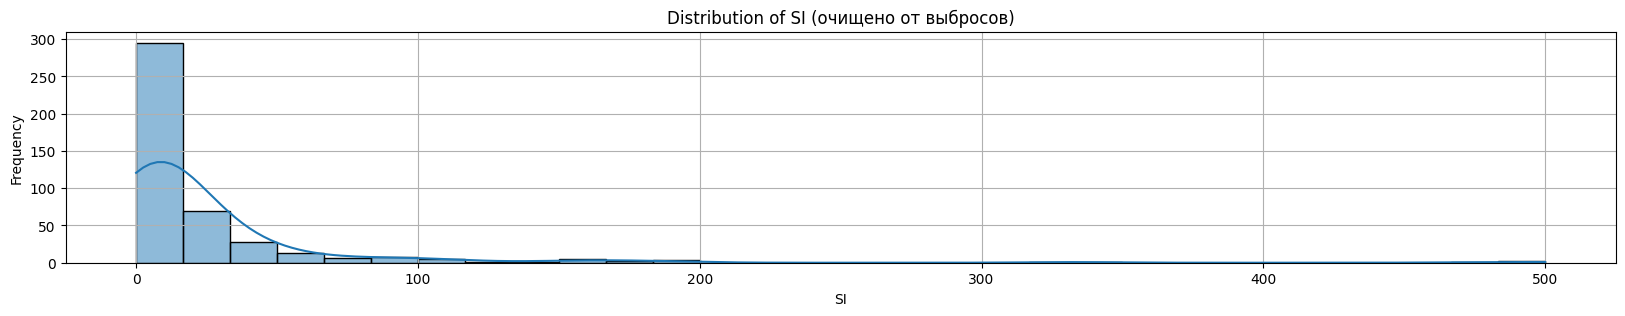

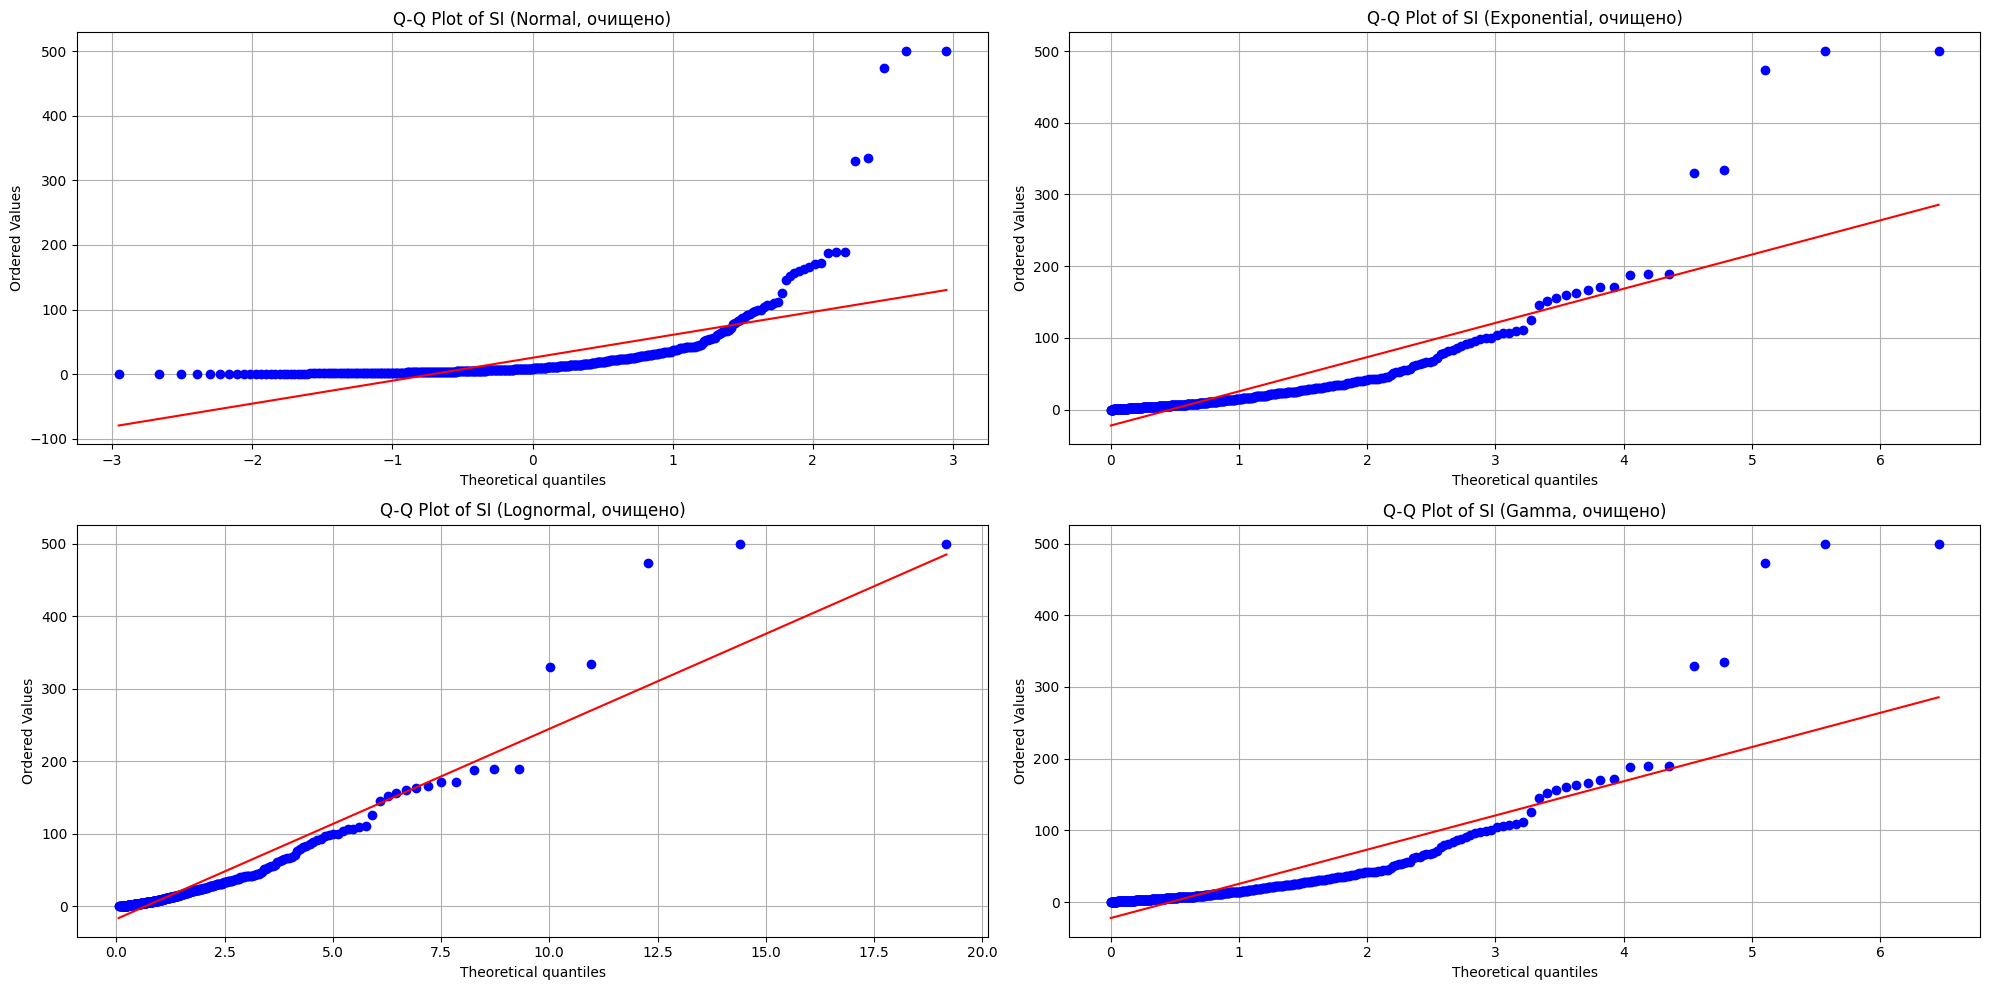

Шапиро-Уилк тест для SI (очищено): статистика=0.426, p-значение=0.000
Андерсон-Дарлинг тест для SI с распределением Normal (очищено): статистика=74.742
Критическое значение для уровня значимости 1.0: 1.082
SI не соответствует Normal распределению (по тесту Андерсона-Дарлинга, очищено)

Андерсон-Дарлинг тест для SI с распределением Exponential (очищено): статистика=44.506
Критическое значение для уровня значимости 1.0: 1.954
SI не соответствует Exponential распределению (по тесту Андерсона-Дарлинга, очищено)



In [ ]:
# @title Анализ распределений целевых переменных
def analyze_distribution(df, column_name):
    cleaned_target = df[column_name]

    plt.figure(figsize=(20, 3))
    sns.histplot(cleaned_target, kde=True, bins=30)
    plt.title(f'Distribution of {column_name} (очищено от выбросов)')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 1)
    probplot(cleaned_target, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column_name} (Normal, очищено)')
    plt.grid(True)

    plt.subplot(2, 2, 2)
    probplot(cleaned_target, dist="expon", plot=plt)
    plt.title(f'Q-Q Plot of {column_name} (Exponential, очищено)')
    plt.grid(True)

    plt.subplot(2, 2, 3)
    probplot(cleaned_target, dist="lognorm", plot=plt, sparams=(1,))
    plt.title(f'Q-Q Plot of {column_name} (Lognormal, очищено)')
    plt.grid(True)

    plt.subplot(2, 2, 4)
    probplot(cleaned_target, dist="gamma", plot=plt, sparams=(1,))
    plt.title(f'Q-Q Plot of {column_name} (Gamma, очищено)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    stat, p_value = shapiro(cleaned_target.dropna())
    print(f'Шапиро-Уилк тест для {column_name} (очищено): статистика={stat:.3f}, p-значение={p_value:.3f}')

    for dist_name, dist_label in zip(['norm', 'expon'], ['Normal', 'Exponential']):
        result = anderson(cleaned_target.dropna(), dist=dist_name)
        print(f'Андерсон-Дарлинг тест для {column_name} с распределением {dist_label} (очищено): статистика={result.statistic:.3f}')

        available_levels = result.significance_level
        closest_level = min(available_levels, key=lambda x: abs(x - 0.05))
        crit_value_index = list(available_levels).index(closest_level)
        critical_value = result.critical_values[crit_value_index]

        print(f'Критическое значение для уровня значимости {closest_level}: {critical_value:.3f}')

        if result.statistic < critical_value:
            print(f'{column_name} соответствует {dist_label} распределению (по тесту Андерсона-Дарлинга, очищено)\n')
        else:
            print(f'{column_name} не соответствует {dist_label} распределению (по тесту Андерсона-Дарлинга, очищено)\n')

# Пример вызова функции анализа
analyze_distribution(cleaned_IC50, 'IC50')
analyze_distribution(cleaned_CC50, 'CC50')
analyze_distribution(cleaned_SI, 'SI')

In [ ]:
# @title Масштабирование, PCA, t-SME. class DataProcessor для масштабирования

class DataProcessor:

    def __init__(self, dataframe, target_columns):
        """
        Инициализация класса с DataFrame и целевыми переменными.
        """
        self.original_df = dataframe
        self.target_columns = target_columns
        self.cleaned_df = None
        self.targets = None
        self.scaler = StandardScaler()
        self.pca_df = None
        self.tsne_df = None

    def clean_data(self):
        """
        Удаление целевых столбцов и заполнение пропусков медианными значениями.
        """
        self.targets = self.original_df[self.target_columns]
        self.cleaned_df = self.original_df.drop(columns=self.target_columns, errors='ignore').fillna(self.original_df.median())

    def scale_data(self):
        """
        Масштабирование данных.
        """
        if self.cleaned_df is not None:
            return self.scaler.fit_transform(self.cleaned_df)
        else:
            raise ValueError("Данные не очищены. Вызовите метод clean_data() перед масштабированием.")

    def apply_pca(self, n_components=0.95):
        """
        Применение PCA к данным.
        """
        scaled_data = self.scale_data()
        pca = PCA(n_components=n_components)
        pca_data = pca.fit_transform(scaled_data)
        self.pca_df = pd.DataFrame(pca_data, columns=[f'PCA{i+1}' for i in range(pca_data.shape[1])])
        for col in self.target_columns:
            self.pca_df[col] = self.targets[col].values

    def apply_tsne(self, n_components=3):
        """
        Применение t-SNE к данным.
        """
        if self.pca_df is not None:
            pca_data = self.pca_df.drop(columns=self.target_columns)
            tsne = TSNE(n_components=n_components)
            tsne_data = tsne.fit_transform(pca_data)
            self.tsne_df = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2', 'TSNE3'])
            for col in self.target_columns:
                self.tsne_df[col] = self.targets[col].values
        else:
            raise ValueError("PCA не был применен. Вызовите метод apply_pca() перед t-SNE.")

    def apply_umap(self, n_components=3, n_neighbors=15, min_dist=0.1, metric='euclidean'):
        """
        Применение UMAP к данным.

        Параметры:
        - n_components: количество размерностей для уменьшения
        - n_neighbors: баланс между локальной и глобальной структурой
        - min_dist: минимальное расстояние между точками в пространстве снижения
        - metric: метрика расстояния ('euclidean', 'cosine', 'manhattan' и др.)
        """
        if self.pca_df is not None:
            pca_data = self.pca_df.drop(columns=self.target_columns)
            umap_model = UMAP(n_components=n_components,
                             n_neighbors=n_neighbors,
                             min_dist=min_dist,
                             metric=metric)
            umap_data = umap_model.fit_transform(pca_data)

            # Создаем DataFrame с UMAP компонентами
            self.umap_df = pd.DataFrame(umap_data,
                                       columns=[f'UMAP{i+1}' for i in range(n_components)])
            for col in self.target_columns:
                self.umap_df[col] = self.targets[col].values
        else:
            raise ValueError("PCA не был применен. Вызовите метод apply_pca() перед UMAP.")

    def save_dataframes(self, directory, df_name):
        """
        Сохранение PCA и t-SNE и UMAP DataFrame в CSV.
        """
        pca_filename = f'pca_{df_name}'
        tsne_filename = f'tsne_{df_name}'
        umap_filename = f'umap_{df_name}'

        if not os.path.exists(directory):
            os.makedirs(directory)

        self.pca_df.to_csv(os.path.join(directory, f'{pca_filename}.csv'), index=False)
        self.tsne_df.to_csv(os.path.join(directory, f'{tsne_filename}.csv'), index=False)

        if hasattr(self, 'umap_df') and self.umap_df is not None:
            self.umap_df.to_csv(os.path.join(directory, f'{umap_filename}.csv'), index=False)

    def visualize(self):
        fig = plt.figure(figsize=(20, 5))
        # 3D визуализация tsme
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')

        ax1.set_title('t-SNE 3D Visualization')
        ax1.set_xlabel('TSNE Component 1')
        ax1.set_ylabel('TSNE Component 2')
        ax1.set_zlabel('TSNE Component 3')

        unique_targets = np.unique(self.targets[self.target_columns[0]].values)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_targets)))

        for i, target in enumerate(unique_targets):
            mask = self.targets[self.target_columns[0]].values == target
            ax1.scatter(self.tsne_df.loc[mask, 'TSNE1'],
                    self.tsne_df.loc[mask, 'TSNE2'],
                    self.tsne_df.loc[mask, 'TSNE3'],
                    color=colors[i], alpha=0.6, label=target)

        # 3D визуализация umap
        ax2 = fig.add_subplot(1, 2, 2, projection='3d')

        ax2.set_title('UMAP 3D Visualization')
        ax2.set_xlabel('UMAP Component 1')
        ax2.set_ylabel('UMAP Component 2')
        ax2.set_zlabel('UMAP Component 3')

        unique_targets = np.unique(self.targets[self.target_columns[0]].values)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_targets)))

        for i, target in enumerate(unique_targets):
            mask = self.targets[self.target_columns[0]].values == target
            ax2.scatter(self.umap_df.loc[mask, 'UMAP1'],
                        self.umap_df.loc[mask, 'UMAP2'],
                        self.umap_df.loc[mask, 'UMAP3'],
                        color=colors[i], alpha=0.6, label=target)
        plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


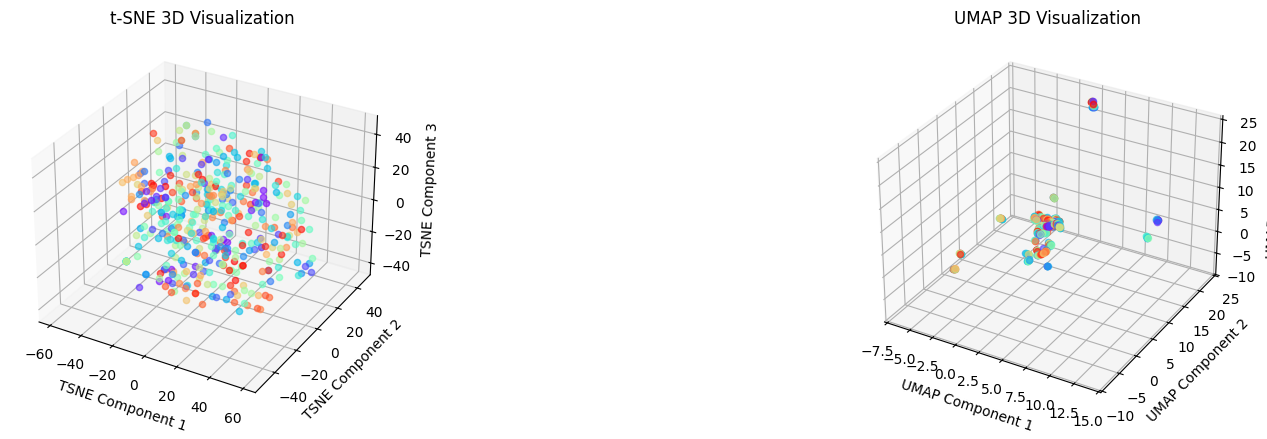

In [ ]:
# @title Масштабирование, PCA, t-SME, UMAP на входе cleaned_IC50
data_dir = '/content/drive/My Drive/Colab Notebooks/data/Kurs_classik_ML/'

# target_columns = ['IC50', 'CC50', 'SI']

processor = DataProcessor(dataframe= cleaned_IC50, target_columns=['IC50'])
processor.clean_data()
processor.apply_pca()
processor.apply_tsne()
processor.apply_umap()
processor.save_dataframes(directory=data_dir, df_name = 'cleaned_IC50')
processor.visualize()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


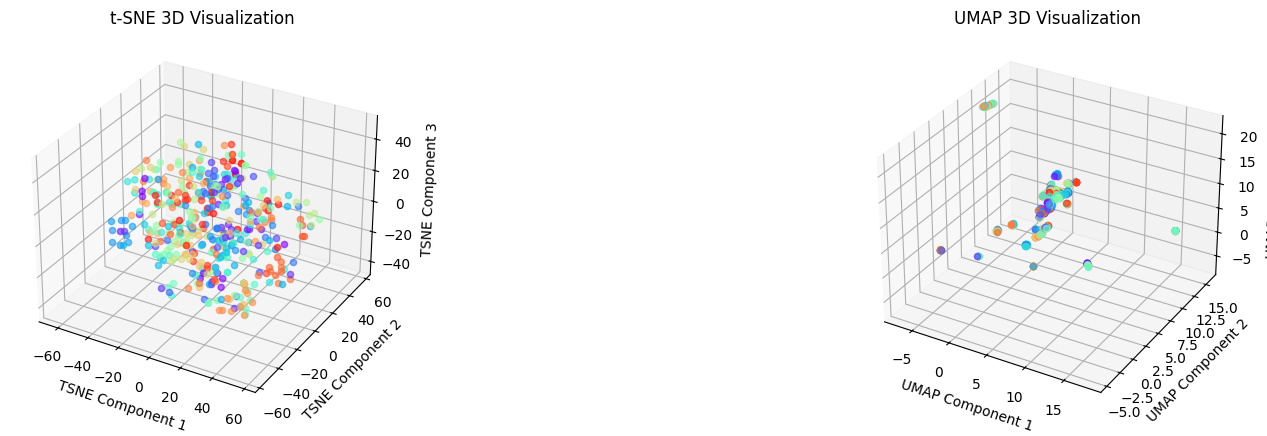

In [ ]:
# @title Масштабирование, PCA, t-SME, UMAP на входе cleaned_CC50
data_dir = '/content/drive/My Drive/Colab Notebooks/data/Kurs_classik_ML/'

# target_columns = ['IC50', 'CC50', 'SI']

processor = DataProcessor(dataframe= cleaned_CC50, target_columns=['CC50'])
processor.clean_data()
processor.apply_pca()
processor.apply_tsne()
processor.apply_umap()
processor.save_dataframes(directory=data_dir, df_name = 'cleaned_CC50')
processor.visualize()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


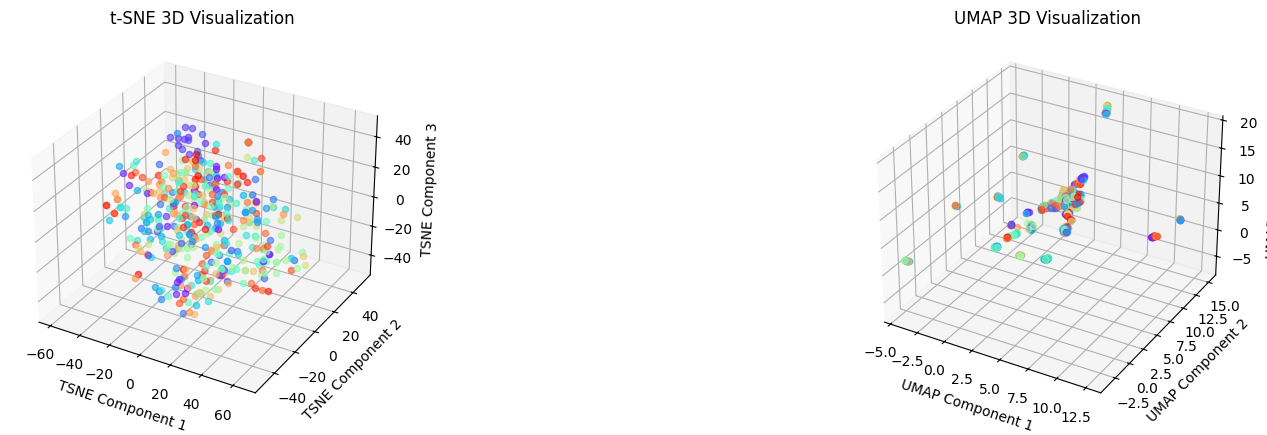

In [ ]:
# @title Масштабирование, PCA, t-SME, UMAP на входе cleaned_SI
data_dir = '/content/drive/My Drive/Colab Notebooks/data/Kurs_classik_ML/'

# target_columns = ['IC50', 'CC50', 'SI']

processor = DataProcessor(dataframe= cleaned_SI, target_columns=['SI'])
processor.clean_data()
processor.apply_pca()
processor.apply_tsne()
processor.apply_umap()
processor.save_dataframes(directory=data_dir, df_name = 'cleaned_SI')
processor.visualize()

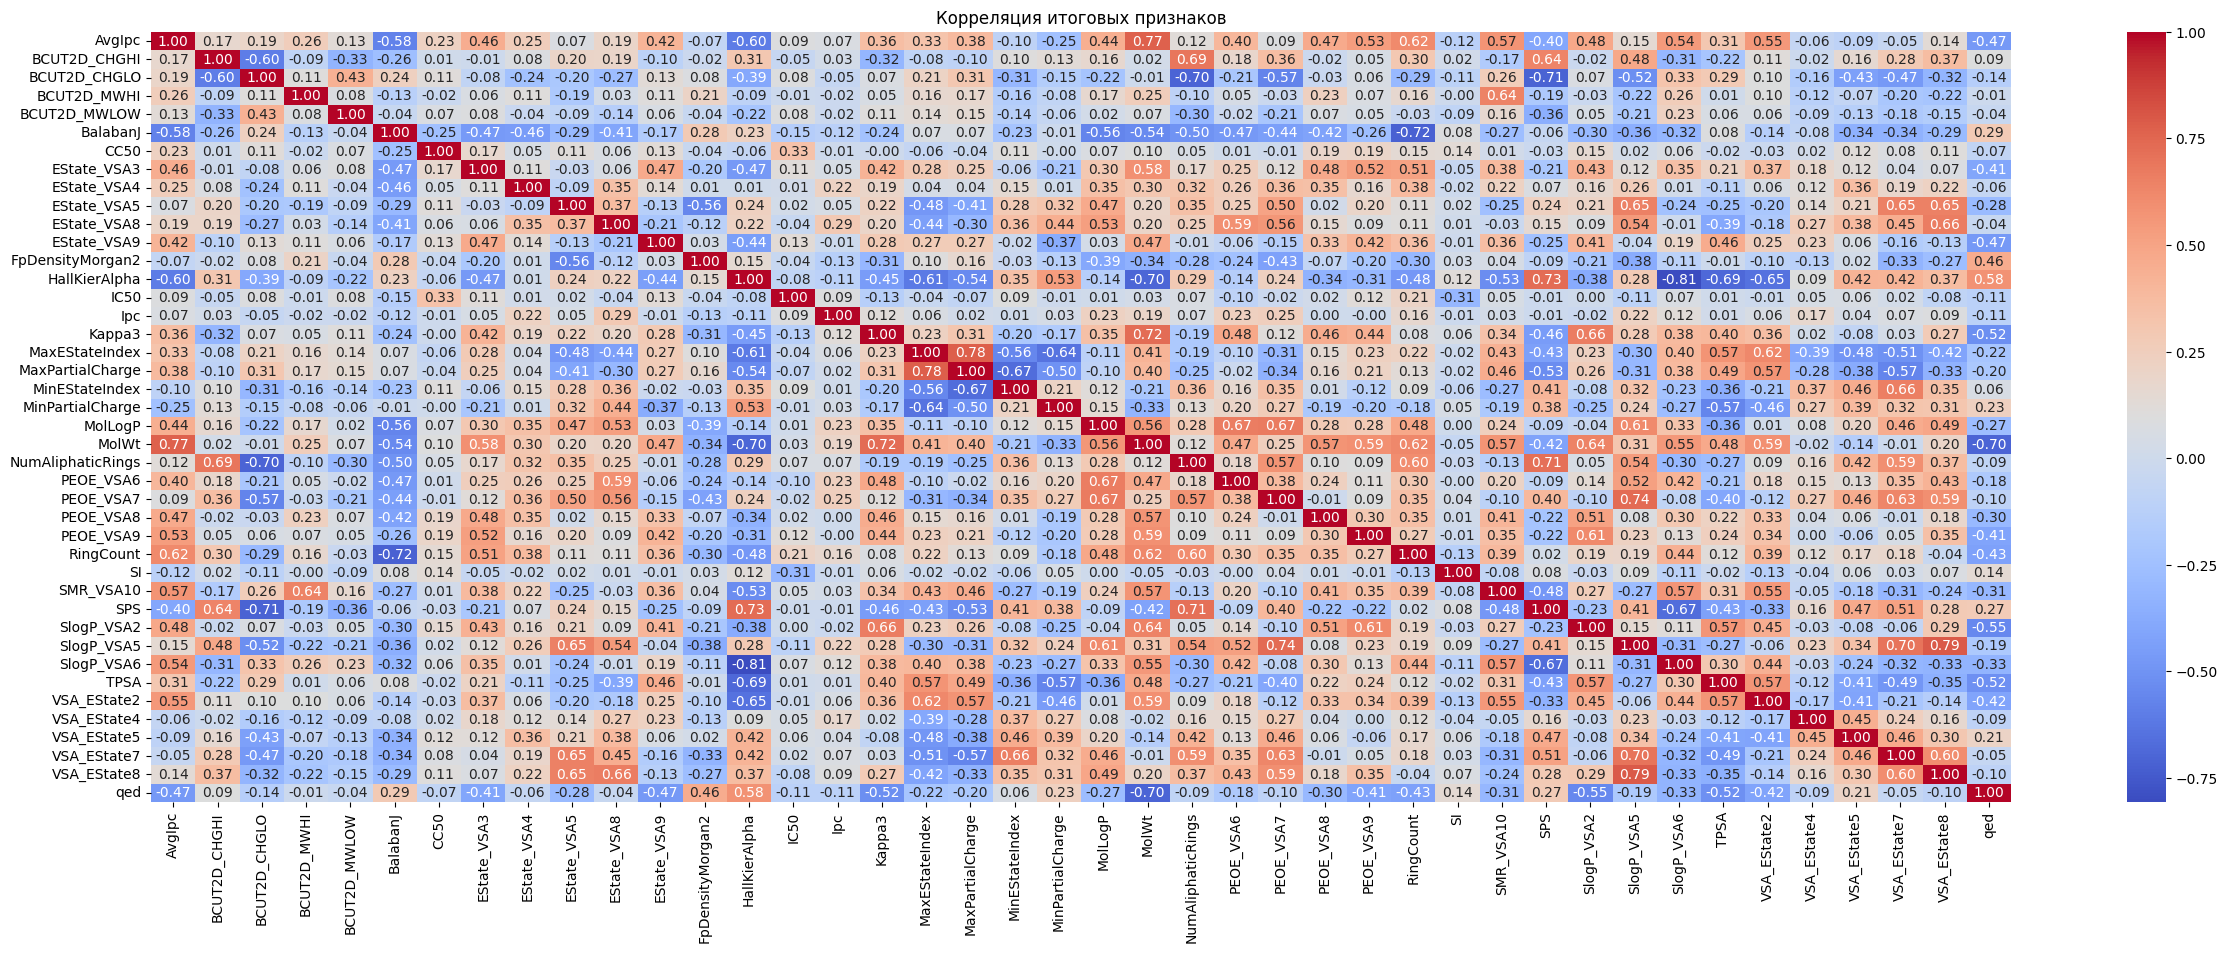

In [ ]:
# @title Вручную построенный датафрейм

# Посчитаем количество нулей по каждому столбцу и удалим столбцы с  нулями более 20%
zero_counts = (cleaned_df == 0).sum()
cols_to_drop = zero_counts[zero_counts > 100].index
cleaned_df_new = cleaned_df.drop(columns=cols_to_drop)

# убраем высосокоррелированне признаки
cols_for_drop = [
    'HeavyAtomMolWt', 'ExactMolWt', 'MolMR', 'Chi1','Chi0', 'Chi0n', 'Chi0v',
    'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n','Chi3v', 'Chi4n', 'Chi4v', 'Kappa1',
    'Kappa2', 'NumValenceElectrons', 'FpDensityMorgan1', 'FpDensityMorgan3',
    'MinAbsEStateIndex', 'MaxAbsEStateIndex', 'BertzCT', 'LabuteASA',
    'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'HeavyAtomCount',
    'NOCount', 'NumHeteroatoms', 'NumHAcceptors', 'FractionCSP3', 'BCUT2D_MRHI',
    'BCUT2D_MRLOW', 'PEOE_VSA1', 'NumRotatableBonds', 'SMR_VSA5', 'BCUT2D_LOGPHI',
    'BCUT2D_LOGPLOW', 'SMR_VSA7', 'SMR_VSA1'
]

cols_existing = [col for col in cols_for_drop if col in cleaned_df_new.columns]
cleaned_df_new_2 = cleaned_df_new.drop(columns=cols_existing)

plt.figure(figsize=(30, 10))  # Можно увеличить размер, если признаков много

sns.heatmap(cleaned_df_new_2.corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f")

plt.title("Корреляция итоговых признаков")
plt.show()

cleaned_df_new_2.to_csv(os.path.join(data_dir, 'df_handmade.csv'), index=False)